# **Problem 1**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
df = pd.read_csv("D3.csv")
X = df.iloc[:, :-1].values  # Explanatory variables x1, x2, x3
y = df.iloc[:, -1].values.reshape(-1, 1)  # Dependent variable y

In [ ]:
# Gradient Descent function
def gd(X, y, alpha, iterations):
    n = len(y)
    theta = np.zeros((X.shape[1], 1))  # Initialize theta to zero
    cost_history = []

    for i in range(iterations):
        predictions = X @ theta
        errors = predictions - y
        gradient = (1 / n) * (X.T @ errors)
        theta -= alpha * gradient
        cost = (1 / (2 * n)) * np.sum(errors ** 2)
        cost_history.append(cost)

    return theta, cost_history


In [ ]:
#Train for each explanatory variable separately
learning_rates = [0.1, 0.05, 0.01]
iterations = 1000

Model for x1 with alpha=0.1: y = 5.9279 + -2.0383 * x1
Final cost for x1 with alpha=0.1: 0.9850
Model for x1 with alpha=0.05: y = 5.9279 + -2.0383 * x1
Final cost for x1 with alpha=0.05: 0.9850
Model for x1 with alpha=0.01: y = 5.2929 + -1.7912 * x1
Final cost for x1 with alpha=0.01: 1.0367


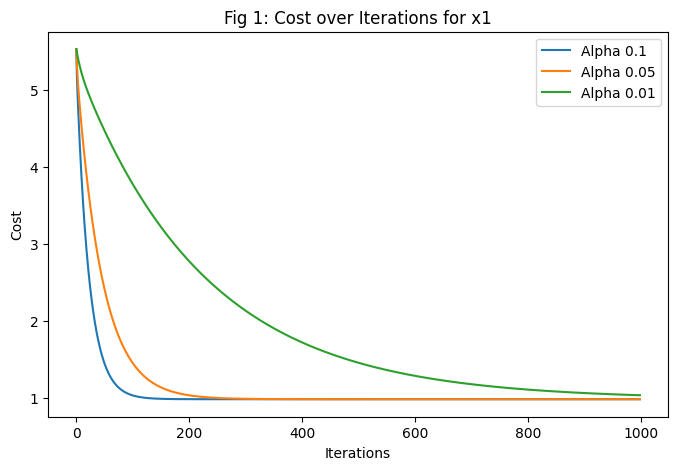

Model for x2 with alpha=0.1: y = 0.7361 + 0.5576 * x2
Final cost for x2 with alpha=0.1: 3.5994
Model for x2 with alpha=0.05: y = 0.7361 + 0.5576 * x2
Final cost for x2 with alpha=0.05: 3.5994
Model for x2 with alpha=0.01: y = 0.6870 + 0.5767 * x2
Final cost for x2 with alpha=0.01: 3.5997


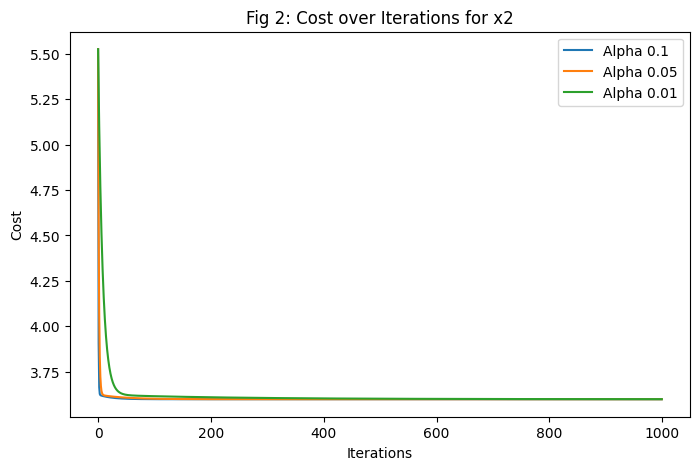

Model for x3 with alpha=0.1: y = 2.8714 + -0.5205 * x3
Final cost for x3 with alpha=0.1: 3.6295
Model for x3 with alpha=0.05: y = 2.8714 + -0.5205 * x3
Final cost for x3 with alpha=0.05: 3.6295
Model for x3 with alpha=0.01: y = 2.5912 + -0.4097 * x3
Final cost for x3 with alpha=0.01: 3.6397


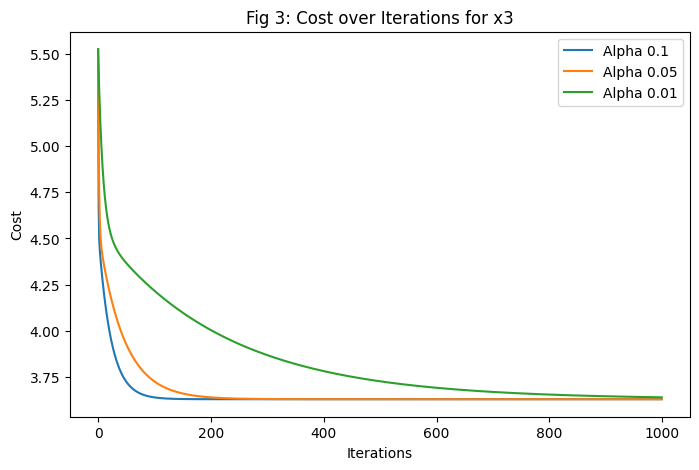

In [ ]:
for i in range(3):
    X_i = X[:, i].reshape(-1, 1)  # Select only one feature
    X_i = np.c_[np.ones((X_i.shape[0], 1)), X_i]  # Add bias term
    plt.figure(figsize=(8, 5))

    for alpha in learning_rates:
        theta, cost_history = gd(X_i, y, alpha, iterations)
        print(f"Model for x{i+1} with alpha={alpha}: y = {theta[0,0]:.4f} + {theta[1,0]:.4f} * x{i+1}")
        print(f"Final cost for x{i+1} with alpha={alpha}: {cost_history[-1]:.4f}")
        plt.title(f"Fig {i+1}: Cost over Iterations for x{i+1}")
        plt.plot(range(iterations), cost_history, label=f'Alpha {alpha}')

    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.legend()
    plt.show()

# **Final Cost**
**For x1**

with alpha=0.1: 0.9850

with alpha=0.05: 0.9850

with alpha=0.01: 1.0367

**For x2**

with alpha=0.1: 3.5994

with alpha=0.05: 3.5994

with alpha=0.01: 3.5997

**For x3**

with alpha=0.1: 3.6295

with alpha=0.05: 3.6295

with alpha=0.01: 3.6397


From here we found that x1 (with learning rate .1 and .05) variable has the lower loss for explaining output Y

# **Impact of the Different Learning Rates on the Final Loss**

Firstly, for x1 the final loss is quite same (0.9850) for learning rate .1 and .05 that means these allows the model to converge more efficiently than the learning rate .01 (final Loss= 1.0367)

Secondly, for  x2, the nature of learning rates are quite same. But the total loss increased to a bigger number (alpha .1 and .05 =3.5994 and alpha .01=3.5997).5997. One reason behind that is x1 is more sensitive to the change in learning rates.

Finally, for x3, this is quite similar to the x2 but with a small increment in the final loss.


so from this we can say we can take either .1 or .05 as learning rate because they provided almost same convergence. and as x1 is more linear to the y than the x2 and x3 thats why the gap between the loss function is greater in x1 but smaller in x2 and x3.

# **Impact of the Different Learning Rates on the Number of Training Iterations**
Learning rate .1 for all explanatory variables the gradient descent algorithm above reaches to its lower cost within few iterations and it converges faster (fasterst among the explanatory variables). But it can cause instability.

Learning rate .05 for all explanatory variables the gradient descent algorithm above reaches to its lower cost within few iterations more than .1 but it is more stable than the .1 . This provide faster convergence and stability.


Learning rate .01 for all explanatory variables the gradient descent algorithm above reaches to its lower cost within much higher iterations than the prvious 2 (.05 and .1) . it is smooth but convergence is much slower.

# **Problem 2**

Final cost for all variables with alpha=0.01: 0.9342
Final cost for all variables with alpha=0.02: 0.7651
Final cost for all variables with alpha=0.03: 0.7421
Final cost for all variables with alpha=0.04: 0.7390
Final cost for all variables with alpha=0.05: 0.7385
Final cost for all variables with alpha=0.06: 0.7385
Final cost for all variables with alpha=0.07: 0.7385
Final cost for all variables with alpha=0.08: 0.7385
Final cost for all variables with alpha=0.09: 0.7385
Final cost for all variables with alpha=0.10: 0.7385


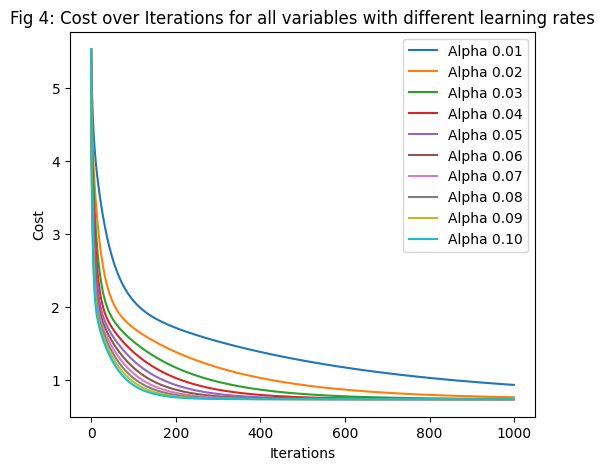

In [102]:
#finding best learning rate
f_X_all = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
plt.figure(figsize=(6, 5))
for f_best_alpha in np.arange(.01,.11,.01):
    f_theta_best, f_cost_history_best = gd(f_X_all, y, f_best_alpha, iterations)
    print(f"Final cost for all variables with alpha={f_best_alpha:.2f}: {f_cost_history_best[-1]:.4f}")
    plt.plot(range(iterations), f_cost_history_best, label=f'Alpha {f_best_alpha:.2f}')

plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Fig 4: Cost over Iterations for all variables with different learning rates")
plt.legend()
plt.show()

Final Model using all variables:
y = 5.2791 + -1.9988 * x1 + 0.5384 * x2 + -0.2605 * x3
Final cost for all variables with alpha=0.05: 0.7385


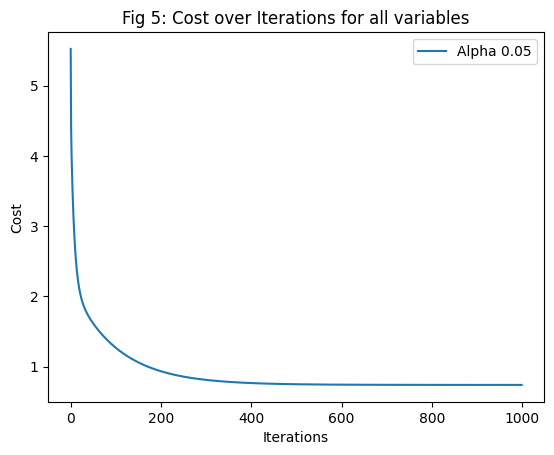

In [ ]:
#use the best learning rate
X_all = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
best_alpha = .05

theta_best, cost_history_best = gd(X_all, y, best_alpha, iterations)
print("Final Model using all variables:")
print(f"y = {theta_best[0,0]:.4f} + {theta_best[1,0]:.4f} * x1 + {theta_best[2,0]:.4f} * x2 + {theta_best[3,0]:.4f} * x3")
print(f"Final cost for all variables with alpha={best_alpha}: {cost_history_best[-1]:.4f}")
plt.figure()
plt.plot(range(iterations), cost_history_best, label=f'Alpha {best_alpha}')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Fig 5: Cost over Iterations for all variables")
plt.legend()
plt.show()


# **Impact of the different learning rates on the final loss**

From the values of Fig 4 we got that the final loss is decreasing when we increase the learning rate. and it is stable to a number .7385 during learning rate period .05 to .1 . Which indicate that this values can provide us with the faster and efficient convergence.
and fom the figure we can see that .05 learning rate is more stable than the other learning rates. So .05 can provide faster and stable convergence.

# **Impact of the different learning rates on the final loss**
From Fig 4 we can see that when the value of learning rate increases the algorithm converge faster with lower iterations than the previous one. That means it taks lower iteration to reach the goal. But with the lower learning rates are the convergence is smooth through the iterations.

In [ ]:
# Predictions for new values
new_values = np.array([[1, 1, 1], [2, 0, 4], [3, 2, 1]])
new_values = np.c_[np.ones((new_values.shape[0], 1)), new_values]
predictions = new_values @ theta_best
print("Predictions for new values:")
for i, pred in enumerate(predictions):
    print(f"Input {new_values[i, 1:]} -> Predicted y: {pred[0]:.4f}")

Predictions for new values:
Input [1. 1. 1.] -> Predicted y: 3.5582
Input [2. 0. 4.] -> Predicted y: 0.2397
Input [3. 2. 1.] -> Predicted y: 0.0991
